# Intermediate Python Programming for Data Analytics

### By: Ashwin Devanga 
### Contact: devanga.a@northeastern.edu
### Wednesday, 31st March 2021

## Agenda
<ol>
    <li>Statistical Analysis on datasets</li>
    <li>Python- Why is it slow?</li>
    <li>Optimisation Methods</li>
    <li>Multiprocessing</li>
    <li>Numba</li>
    <li>GPU Computation using vectorize in Numba</li>
</ol>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn import datasets

In [2]:
#Load Iris dataset

data = datasets.load_iris()
iris = pd.DataFrame(data.data, columns=data.feature_names)
iris["type"] = data.target

iris.reset_index(inplace=True)
iris = iris.rename(columns = {'index':'sl no'})

iris.sample(n = 10)

,sl no,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
122,122,7.7,2.8,6.7,2.0,2
79,79,5.7,2.6,3.5,1.0,1
145,145,6.7,3.0,5.2,2.3,2
98,98,5.1,2.5,3.0,1.1,1
52,52,6.9,3.1,4.9,1.5,1
4,4,5.0,3.6,1.4,0.2,0
96,96,5.7,2.9,4.2,1.3,1
127,127,6.1,3.0,4.9,1.8,2
29,29,4.7,3.2,1.6,0.2,0
74,74,6.4,2.9,4.3,1.3,1


In [3]:
#Statistics from the dataset
print("columns",iris.columns)
print("*********")
print("shape:",iris.shape)
print("*********")
print("Size:",iris.size)
print("*********")
print("no of samples available for each type") 
print(iris["type"].value_counts())
print("*********")
iris.describe()

columns Index(['sl no', 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'type'],
      dtype='object')
*********
shape: (150, 6)
*********
Size: 900
*********
no of samples available for each type
0    50
1    50
2    50
Name: type, dtype: int64
*********


,sl no,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,74.500000,5.843333,3.057333,3.758000,1.199333,1.000000
std,43.445368,0.828066,0.435866,1.765298,0.762238,0.819232
min,0.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,37.250000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,74.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,111.750000,6.400000,3.300000,5.100000,1.800000,2.000000
max,149.000000,7.900000,4.400000,6.900000,2.500000,2.000000


### Covariance

The formula used to calculate this is as follows.

<img src="./files/covariance_formula.svg">

In [4]:
#Covariance Matrix

iris.cov()

,sl no,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
sl no,1887.500000,25.782886,-7.618121,67.692953,29.805034,33.557047
sepal length (cm),25.782886,0.685694,-0.042434,1.274315,0.516271,0.530872
sepal width (cm),-7.618121,-0.042434,0.189979,-0.329656,-0.121639,-0.152349
petal length (cm),67.692953,1.274315,-0.329656,3.116278,1.295609,1.372483
petal width (cm),29.805034,0.516271,-0.121639,1.295609,0.581006,0.597315
type,33.557047,0.530872,-0.152349,1.372483,0.597315,0.671141


### Correlation
It tells us how much a feature is related to another feature. It's value always lies between -1 and 1. Anything close to -1 or 1 shows a large correlation but anything close to zero shows n correlation between the two features. Correlation being zero means that the variance obtained by one feature is not overlapped by another feature.

<img src="./files/correlation_coefficient_formula.svg">

this can be translated as:

### corr(x,y) = cov(x,y) / ( sd(x) * (sd(y) )

In [5]:
#Corelation Matrix

iris.corr()

,sl no,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
sl no,1.000000,0.716676,-0.402301,0.882637,0.900027,0.942830
sepal length (cm),0.716676,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.402301,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.882637,0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.900027,0.817941,-0.366126,0.962865,1.000000,0.956547
type,0.942830,0.782561,-0.426658,0.949035,0.956547,1.000000


### Correlation Heatmaps

Correlation Heatmaps are a great way to visualise correlation. It can help us eleminate features before model building and is an important tool for data analysis.

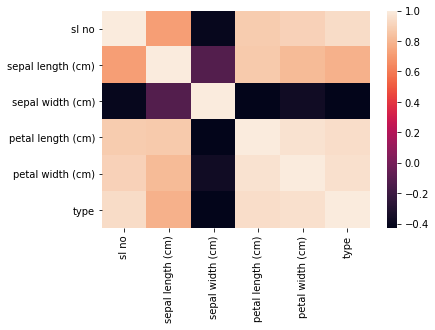

In [6]:
#Corelation heatmap

sns.heatmap(iris.corr());

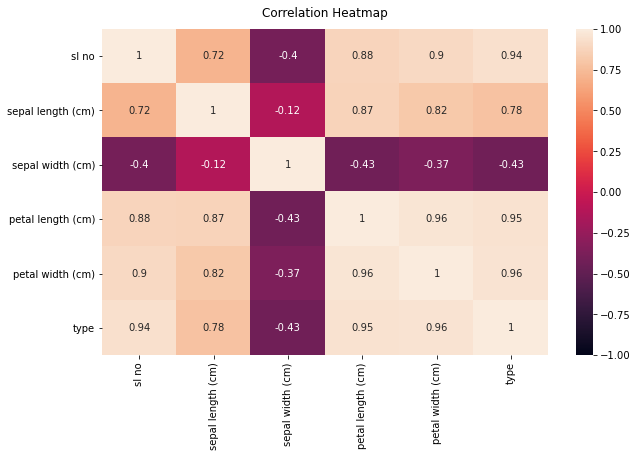

In [7]:
#Corelation heatmap - Make it look better

plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(iris.corr(), vmin=-1, vmax=1, annot=True);
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

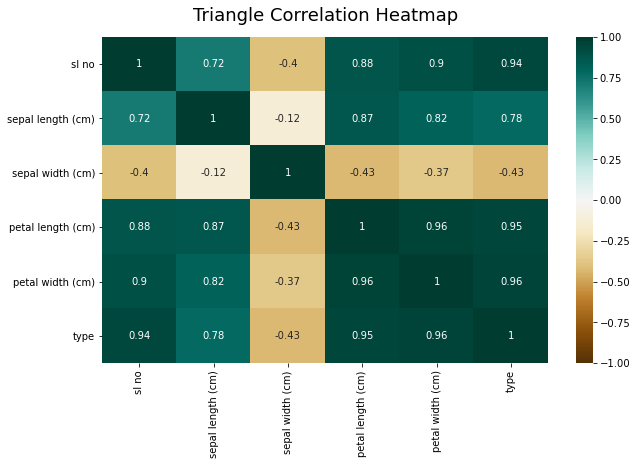

In [8]:
#Correlation Heatmap - change color

plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(iris.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
plt.show()

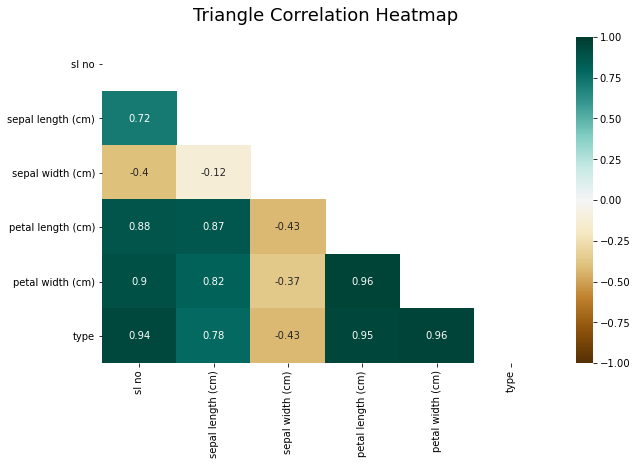

In [9]:
#Corelation Heatmap - Add a mask

plt.figure(figsize=(10, 6))
mask = np.triu(np.ones_like(iris.corr(), dtype=np.bool))
heatmap = sns.heatmap(iris.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
plt.show()

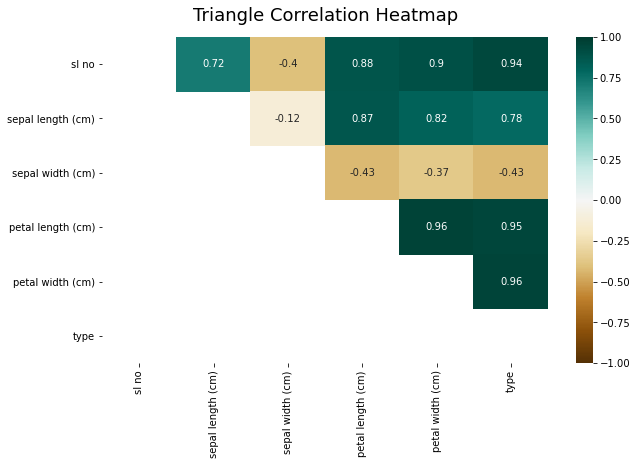

In [10]:
#Correlation Heatmap - Maybe a lower mask?

plt.figure(figsize=(10, 6))
mask = np.tril(np.ones_like(iris.corr(), dtype=np.bool))
heatmap = sns.heatmap(iris.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
plt.show()

### PCA - Principal Component Analysis
PCA is basically taking features of a dataset which each have different variances and merging them to form new features which have variances in decreasing order. This is mainly used dor dimention reduction.

In [11]:
#Load Iris dataset

data = datasets.load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
Y = pd.DataFrame(data.target, columns=["target"])


<ipython-input-12-4d6cc0e959d2>:33: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


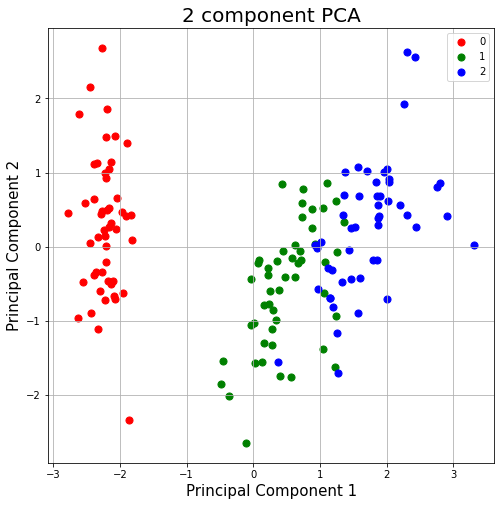

In [12]:
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

#Standardize X
sc = StandardScaler()
X_standardized = sc.fit_transform(X)
X_standardized = pd.DataFrame(X_standardized)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_standardized)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, Y ], axis = 1)
finalDf.columns = ['principal component 1', 'principal component 2', 'target']

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

fig.show()

## Python - Why is it slow?

Python is a dynamically typed language, which compared to other languages such as C or Java which are statically typed langauges.

Python has a GIL (Global Interpreter Lock). This is a very simplified way of stating it. Technically GIL was removed in Python 1.5 or thereabouts but was replaced with several other locks. This prevents the code from accessing multiple cores on your system.

We shall see how we can speed up calculations in python.

## How can we speed up Python programs?

We can speed up python by unlocking the GIL and also setting up static datatypes. This is done by using different interpreters for python but it is not as difficult as you would think.

There are many ways for different use cases. Cython is one of the most popular choices as it allows for dependancy packaging as well. However, it requires a working knowledge of the c compiler on your system. Windows, that is generally Visual C. In Linux it is gcc and macOS it is clang. Ofcourse, you could set the c compiler manually to a different one for Cython.

Then there is PyPy. It is also an excelent choice but is slightly complicated to use. It does have a learning curve.

For data-science and simulations engineering, Numba is the best option. It can make use of multiple cores and also the gpu if required. It does have it's drawbacks which we will see later.

PS: Cython is not t be confused with CPython. CPython is the default python interpreter whiich you all have installed on your system. Cython is a compiler for \*.pyx files which converts it into C code and then is compiled by your inbuilt c compiler.

### CPU Single threaded performance
This script adds 100 million values and checks the time taken to run these calculations on a single thread.

In [13]:
%reset -f
import warnings
warnings.simplefilter("ignore")

import time
import numpy as np

def vector_add_cpu(a, b):
    c = []
    for i in range(a.shape[0]):
        c.append(a[i] + b[i])
    return c

NUM_ELEMENTS = 100000000
a_source = np.ones(NUM_ELEMENTS, dtype=np.float32)
b_source = np.ones(NUM_ELEMENTS, dtype=np.float32)

starttime = time.time()

vector_add_cpu(a_source, b_source)

print()    
print('Time taken = {} seconds'.format(time.time() - starttime))


Time taken = 34.69359874725342 seconds


Removing dynamic allocation generally speeds up the code.

In [14]:
%reset -f
import warnings
warnings.simplefilter("ignore")

import time
import numpy as np

def vector_add_cpu(a, b):
    c = np.zeros(a.shape[0], dtype=np.float32)
    for i in range(a.shape[0]):
        c[i] = a[i] + b[i]
    return c

NUM_ELEMENTS = 100000000
a_source = np.ones(NUM_ELEMENTS, dtype=np.float32)
b_source = np.ones(NUM_ELEMENTS, dtype=np.float32)

starttime = time.time()

vector_add_cpu(a_source, b_source)

print()    
print('Time taken = {} seconds'.format(time.time() - starttime))


Time taken = 34.52767372131348 seconds


### CPU Multi threaded performance
This script adds 100 million values and checks the time taken to run these calculations on multiple threads. Unfortunately, this script cant be run in interactive mode and it results in errors. the following script is stored as multicore.py and is run from there below.

```python

import time
import multiprocessing
import numpy as np

def vector_add_cpu(a, b):
    c = np.zeros(a.shape[0], dtype=np.float32)
    for i in range(a.shape[0]):
        c[i] = a[i] + b[i]
    return c

def multiprocessing_func(j, a, b):
    vector_add_cpu(a,b)
    
if __name__ == '__main__':
    NUM_ELEMENTS = 100000000
    NUM_CORES = 6
    
    a_source = np.ones(NUM_ELEMENTS, dtype=np.float32)
    b_source = np.ones(NUM_ELEMENTS, dtype=np.float32)

    starttime = time.time()
    processes = []
    
    a_split = [[] for i in range(NUM_CORES)]
    b_split = [[] for i in range(NUM_CORES)]
    
    a_split = np.array_split(a_source, NUM_CORES)
    b_split = np.array_split(b_source, NUM_CORES)
                
    a_split = np.array(a_split)
    b_split = np.array(b_split)

    for j in range(NUM_CORES):
        p = multiprocessing.Process(target=multiprocessing_func, args=(j, a_split[j], b_split[j], ))
        print("adding process ", j)
        processes.append(p)
    
    for process in processes:
        process.start()
    
    for process in processes:
        process.join()
        
    print()    
    print('Time taken = {} seconds'.format(time.time() - starttime))
    
```

In [15]:
%reset -f
import warnings
warnings.simplefilter("ignore")

%run multicore.py

adding process  0
adding process  1
adding process  2
adding process  3
adding process  4
adding process  5

Time taken = 8.181577920913696 seconds


That code is just a disaster waiting to happen. It can cause crashes and you need to be very carefull with the loops or your computer will crash.

## Numba

Numba is a package which can be installed via pip or conda but conda is prefered. It is actually an interpreter by itself but runs as a package within python.

In [16]:
%reset -f
import warnings
warnings.simplefilter("ignore")

import time
import numpy as np
from numba import njit

@njit()
def vector_add_cpu(a, b, n):
    c = []
    for i in range(n):
        c.append(a[i] + b[i])
    return c

##Compile code
_ = vector_add_cpu([1], [1], 1)

NUM_ELEMENTS = 100000000
a_source = np.ones(NUM_ELEMENTS, dtype=np.float32)
b_source = np.ones(NUM_ELEMENTS, dtype=np.float32)


starttime = time.time()

new_function = (vector_add_cpu)

new_function(a_source, b_source, NUM_ELEMENTS)

print()    
print('Time taken = {} seconds'.format(time.time() - starttime))


Time taken = 3.4284889698028564 seconds


That was really fast with very few modifications to the normal python code. Whats the catch?

Same calculations but adding multithreading we get this.

In [17]:
%reset -f
import warnings
warnings.simplefilter("ignore")

import time
import numpy as np
from concurrent.futures import ThreadPoolExecutor

from numba import njit

@njit(nogil=True)
def vector_add_cpu(a, b, n):
    c = np.zeros(n, dtype=np.float32)
    for i in range(n):
        c[i] = a[i] + b[i]
    return c

##Compile code
_ = vector_add_cpu([1], [1], np.array([1]).shape[0])

NUM_ELEMENTS = 100000000
NUM_CORES = 6
a_source = np.ones(NUM_ELEMENTS, dtype=np.float32)
b_source = np.ones(NUM_ELEMENTS, dtype=np.float32)

starttime = time.time()

a_split = [[] for i in range(NUM_CORES)]
b_split = [[] for i in range(NUM_CORES)]

a_split = np.array_split(a_source, NUM_CORES)
b_split = np.array_split(b_source, NUM_CORES)

a_split = np.array(a_split)
b_split = np.array(b_split)

n = []
for i in range(NUM_CORES):
    n.append(a_split[i].shape[0])
n = np.array(n)

with ThreadPoolExecutor(NUM_CORES) as ex:
    ex.map(vector_add_cpu, a_split, b_split, n)

print()    
print('Time taken = {} seconds'.format(time.time() - starttime))


Time taken = 0.30096006393432617 seconds


In [18]:
%reset -f
import warnings
warnings.simplefilter("ignore")

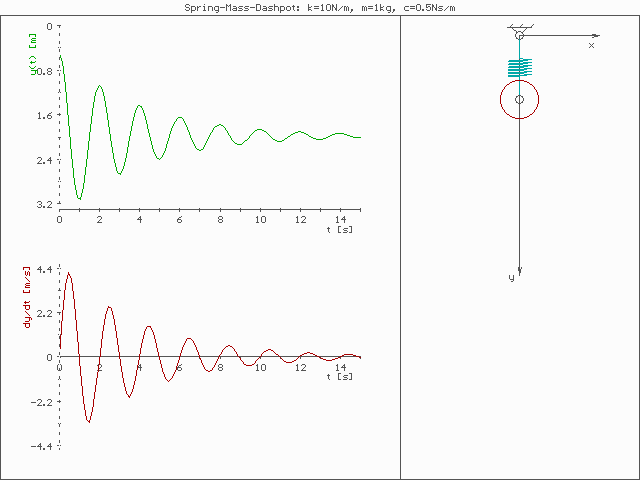

In [19]:
import time
import numpy as np
from numba import njit
from IPython.display import Image

Image('https://upload.wikimedia.org/wikipedia/commons/f/fa/Spring-mass_under-damped.gif')

In [20]:
%pylab inline

# Let's mix wet friction with dry friction, this makes the behavior
# of the system dependent on the initial condition, something
# may be interesting to study by running an exhaustive simluation

def friction_fn(v, vt):
    if v > vt:
        return - v * 3
    else:
        return - vt * 3 * np.sign(v)

def simulate_spring_mass_funky_damper(x0, T=10, dt=0.0001, vt=1.0):
    times = np.arange(0, T, dt)
    positions = np.zeros_like(times)
    
    v = 0
    a = 0
    x = x0
    positions[0] = x0/x0
    
    for ii in range(len(times)):
        if ii == 0:
            continue
        t = times[ii]
        a = friction_fn(v, vt) - 100*x
        v = v + a*dt
        x = x + v*dt
        positions[ii] = x/x0
    return times, positions

Populating the interactive namespace from numpy and matplotlib


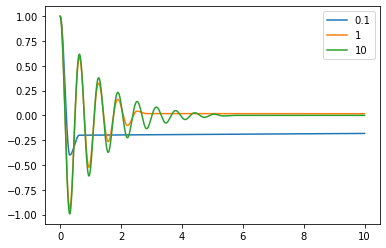

In [21]:
plot(*simulate_spring_mass_funky_damper(0.1))
plot(*simulate_spring_mass_funky_damper(1))
plot(*simulate_spring_mass_funky_damper(10))
legend(['0.1', '1', '10'])

In [22]:
%time _ = simulate_spring_mass_funky_damper(0.1)

Wall time: 280 ms


Alright, so if I run this for initial conditions between 0 and 1000 on 0.1 increments the total time taken will be 2500 seconds, which is sligtly more than 46 minutes

(280/1000) x 10000 x (10/1) = 2800 seconds

Adding njit() to check time

In [23]:
@njit
def friction_fn(v, vt):
    if v > vt:
        return - v * 3
    else:
        return - vt * 3 * np.sign(v)

@njit
def simulate_spring_mass_funky_damper(x0, T=10, dt=0.0001, vt=1.0):
    times = np.arange(0, T, dt)
    positions = np.zeros_like(times)
    
    v = 0
    a = 0
    x = x0
    positions[0] = x0/x0
    
    for ii in range(len(times)):
        if ii == 0:
            continue
        t = times[ii]
        a = friction_fn(v, vt) - 100*x
        v = v + a*dt
        x = x + v*dt
        positions[ii] = x/x0
    return times, positions

_ = simulate_spring_mass_funky_damper(0.1)

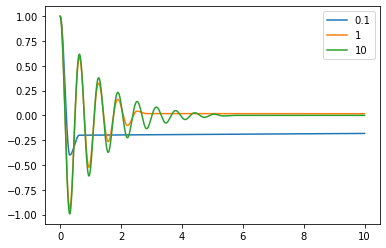

In [24]:
plot(*simulate_spring_mass_funky_damper(0.1))
plot(*simulate_spring_mass_funky_damper(1))
plot(*simulate_spring_mass_funky_damper(10))
legend(['0.1', '1', '10'])

In [25]:
%time _ = simulate_spring_mass_funky_damper(0.1)

Wall time: 2 ms


time = (2/1000) x 1000 x (10/1) = 20 seconds

Now let's say for the sake of argument that 20 seconds is too slow (maybe I need to run the whole simulation multiple times).

We can obviously turn to threading. Let's use ThreadPoolExecutor. I have 6 cores available, so let's try to use them.

In [26]:
@njit
def friction_fn(v, vt):
    if v > vt:
        return - v * 3
    else:
        return - vt * 3 * np.sign(v)

@njit
def simulate_spring_mass_funky_damper(x0, T=10, dt=0.0001, vt=1.0):
    times = np.arange(0, T, dt)
    positions = np.zeros_like(times)
    
    v = 0
    a = 0
    x = x0
    positions[0] = x0/x0
    
    for ii in range(len(times)):
        if ii == 0:
            continue
        t = times[ii]
        a = friction_fn(v, vt) - 100*x
        v = v + a*dt
        x = x + v*dt
        positions[ii] = x/x0
    return times, positions

_ = simulate_spring_mass_funky_damper(0.1)

In [27]:
%%time
from concurrent.futures import ThreadPoolExecutor

with ThreadPoolExecutor(6) as ex:
    ex.map(simulate_spring_mass_funky_damper, np.arange(0, 1000, 0.1))

Wall time: 17.4 s


Not fast. The reason? GIL is still enabled. We need to disable GIL

In [28]:
@njit(nogil=True)
def friction_fn(v, vt):
    if v > vt:
        return - v * 3
    else:
        return - vt * 3 * np.sign(v)

@njit(nogil=True)
def simulate_spring_mass_funky_damper(x0, T=10, dt=0.0001, vt=1.0):
    times = np.arange(0, T, dt)
    positions = np.zeros_like(times)
    
    v = 0
    a = 0
    x = x0
    positions[0] = x0/x0
    
    for ii in range(len(times)):
        if ii == 0:
            continue
        t = times[ii]
        a = friction_fn(v, vt) - 100*x
        v = v + a*dt
        x = x + v*dt
        positions[ii] = x/x0
    return times, positions

# compile
_ = simulate_spring_mass_funky_damper(0.1)

In [29]:
%%time
from concurrent.futures import ThreadPoolExecutor

with ThreadPoolExecutor(6) as ex:
    ex.map(simulate_spring_mass_funky_damper, np.arange(0, 1000, 0.1))

Wall time: 2.06 s


That works, but the code looks complex. We do not want to learn another package. ThreadpoolExecutor can have issues just like multiprocessing as we saw in the beginning of the optimisation section. Numba can do this automatically.

In [30]:
@njit(nogil=True)
def friction_fn(v, vt):
    if v > vt:
        return - v * 3
    else:
        return - vt * 3 * np.sign(v)

@njit(nogil=True)
def simulate_spring_mass_funky_damper(x0, T=10, dt=0.0001, vt=1.0):
    times = np.arange(0, T, dt)
    positions = np.zeros_like(times)
    
    v = 0
    a = 0
    x = x0
    positions[0] = x0/x0
    
    for ii in range(len(times)):
        if ii == 0:
            continue
        t = times[ii]
        a = friction_fn(v, vt) - 100*x
        v = v + a*dt
        x = x + v*dt
        positions[ii] = x/x0
    return times, positions

# compile
_ = simulate_spring_mass_funky_damper(0.1)

In [31]:
from numba import prange
@njit(nogil=True, parallel=True)
def run_sims(end=1000):
    for x0 in prange(int(end/0.1)):
        if x0 == 0:
            continue
        simulate_spring_mass_funky_damper(x0*0.1)

#compile        
_ = run_sims(1)

In [32]:
%time run_sims()

Wall time: 1.72 s


### GPU Computation

This snippet works only with CUDA. i.e Nvidia based GPUs with cuda installed.

In [33]:
%reset -f
import warnings
warnings.simplefilter("ignore")

import numpy as np
import time
from numba import vectorize
from tqdm.auto import tqdm


In [34]:
test_list = np.arange(100000000)

In [35]:
@vectorize(nopython=True)
def non_list_function(item):
    if item % 2 == 0:
        return 1
    else:
        return 0

In [36]:
print("is 1 even? ",non_list_function(1))
print("is 2 even? ",non_list_function(2))

is 1 even?  0
is 2 even?  1


In [37]:
x = np.arange(1,21)
print(non_list_function(x))

[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


In [38]:
%time non_list_function(test_list)

Wall time: 170 ms


array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [39]:
%reset -f
import warnings
warnings.simplefilter("ignore")

import numpy as np
import time
from numba import vectorize
from tqdm.auto import tqdm

In [40]:
test_list = np.arange(100000000, dtype=np.int32)

In [41]:
@vectorize(["int8(int32)"], nopython=True, target='cuda')
def non_list_function(item):
    if item % 2 == 0:
        return 1
    else:
        return 0

In [42]:
print("is 1 even? ",non_list_function(1))
print("is 2 even? ",non_list_function(2))

is 1 even?  [0]
is 2 even?  [1]


In [43]:
x = np.arange(1,21, dtype=np.int32)
print(non_list_function(x))

[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


In [44]:
%time non_list_function(test_list)

Wall time: 157 ms


array([1, 0, 1, ..., 0, 1, 0], dtype=int8)

In [45]:
%reset -f
import warnings
warnings.simplefilter("ignore")

import numpy as np
import time
from numba import vectorize
from tqdm.auto import tqdm

NUM_ELEMENTS = 100000000
 
# This is the GPU version. Note the @vectorize decorator. This tells
# numba to turn this into a GPU vectorized function.
@vectorize(["float32(float32, float32)"], target='cuda')
def vector_add_gpu(a, b):
    return a + b;
 
if __name__ == "__main__":
    a_source = np.ones(NUM_ELEMENTS, dtype=np.float32)
    b_source = np.ones(NUM_ELEMENTS, dtype=np.float32)
 
    # Time the GPU function
    start = time.time()
    vector_add_gpu(a_source, b_source)
    vector_add_gpu_time = time.time() - start
 
    # Report times
    print("GPU function took %f seconds." % vector_add_gpu_time)

GPU function took 0.496024 seconds.


## How would I want to use this?

Here is an example where you might use these techniques. This function calculates the standard deviation of a distribution stored in a numpy array.

In [46]:
%reset -f
import warnings
warnings.simplefilter("ignore")

import math

def std_dev(X):
    mean = 0
    for xi in X:
        mean = mean + xi
    mean = mean/len(X)
    
    ms = 0
    for xi in X:
        ms = ms + (xi - mean)**2
    var = ms/len(X)
    sd = math.sqrt(var)
    
    return sd

In [47]:
from numba import njit

@njit()
def std_dev_njit(X):
    mean = 0
    for xi in X:
        mean = mean + xi
    mean = mean/len(X)
    
    ms = 0
    for xi in X:
        ms = ms + (xi - mean)**2
    var = ms/len(X)
    sd = math.sqrt(var)
    
    return sd


In [48]:
import numpy as np

#compile
_ = std_dev_njit(np.array([1,1,1]))

mean = 0
sd = 1
a = np.random.normal(mean, sd, 100000000)

In [49]:
# Using the regular method of calculation. No optimizations

%time std_dev(a)

Wall time: 1min 8s


1.0001477499879914

In [50]:
# Using Numpy's builtin function to calculate std
%time a.std()

Wall time: 536 ms


1.0001477499880065

In [51]:
#Using our function with optimization.

%time std_dev_njit(a)

Wall time: 359 ms


1.0001477499879914

## References

1. Pandas Documentation : https://pandas.pydata.org/docs/
2. Numba Documentation : https://numba.pydata.org/numba-doc/latest/index.html
3. Github Snippets : https://gist.github.com/safijari/fa4eba922cea19b3bc6a693fe2a97af7